In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['price'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Text(0, 0.5, 'count')

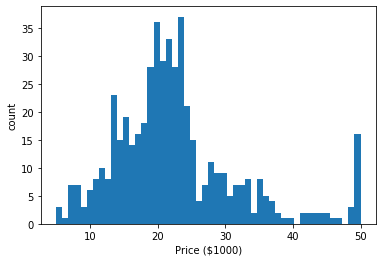

In [12]:
plt.hist(df['price'], bins=50)
plt.xlabel('Price ($1000)')
plt.ylabel('count')

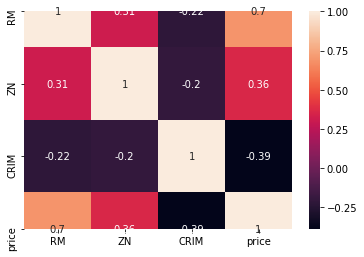

In [14]:
sns.heatmap(df[['RM','ZN','CRIM','price']].corr(), annot=True)

In [15]:
X = df[['ZN','CRIM','AGE','LSTAT','DIS',"RM"]]
y = df.price

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
slm = LinearRegression()
slm.fit(X_train,y_train)
print(slm.coef_, slm.intercept_)

[ 0.05834141 -0.17564927 -0.02529785 -0.66556685 -1.24284723  4.53727272] 8.905286971987993


In [19]:
predicted = slm.predict(X_test)

In [10]:
slm = LinearRegression()
slm.fit(X,y)
predicted = slm.predict(X)

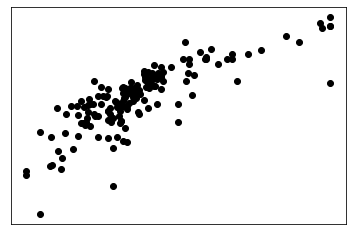

In [20]:
plt.scatter(y_test,predicted, color = "black")
#plt.plot(X, predicted, color = "blue", linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

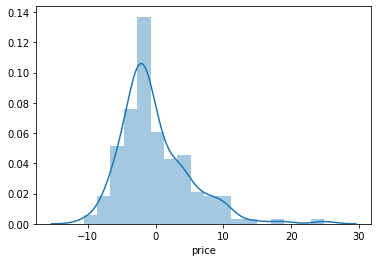

In [21]:
sns.distplot(y_test - predicted)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print("Mean Absolute Error MAE: %.2f" %mean_absolute_error(y_test, predicted))
print("Mean Squared Error MSE: %.2f" %mean_squared_error(y_test, predicted))
print("Root Mean Squared Error RMSE: %.2f" %np.sqrt(mean_squared_error(y_test, predicted)))
print("Variance r2: %.2f" %r2_score(y_test, predicted))

Mean Absolute Error MAE: 3.87
Mean Squared Error MSE: 26.60
Root Mean Squared Error RMSE: 5.16
Variance r2: 0.65


### Exponential

In [28]:
log_y = np.log(df.price)
X2 = df[["RM"]]

slm_exp = LinearRegression()
slm_exp.fit(X2,log_y)
print(slm_exp.coef_)
print(slm_exp.intercept_)

[0.36768673]
0.7237361931657591


### Ridge & Lasso

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

slm = LinearRegression()
scores = cross_val_score(slm, boston.data, boston.target, cv =5)
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [29]:
Rlf = Ridge(alpha = 1.0)

score = cross_val_score(Rlf, boston.data, boston.target, cv =5)
score

array([ 0.66089569,  0.74094893,  0.62923672,  0.08530169, -0.17029513])

In [30]:
clf = Lasso(alpha = 0.1)

score = cross_val_score(clf, boston.data, boston.target, cv =5)
score

array([ 0.67506707,  0.73258026,  0.63257181,  0.09513993, -0.12050216])